## Analyze given data set 
- Check data shape 
- Describe data
- Check for null values and drop null values or replace it
- Drop colums that you find unnecessary
- What is revenue distribution for Bekins in 2005 
- What is the growth% for Data/Technology in 2006
- What is the Revenue distribution for Education in 2005
- What is number of companies in Each industry 
- Draw a correlation plot to check on feature realtionship. 


In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output


In [2]:
xls = pd.ExcelFile('CompanyDetails.xlsx')
overview = pd.read_excel(xls, 'Overview')
comp = pd.read_excel(xls, 'Financials')

In [3]:
#xls.shape
overview.head()


,ID,Name,Industry,Year Founded,Employees,State,City,Zip Code
0,1,"3 Round Stones, Inc.",Data/Technology,2010.0,4000,DC,Washington,20004.0
1,2,48 Factoring Inc.,Finance & Investment,2014.0,198,PA,Philadelphia,19087.0
2,3,5PSolutions,Data/Technology,2007.0,4500,VA,Fairfax,22003.0
3,4,Abt Associates,Research & Consulting,1965.0,4958,MA,Cambridge,2138.0
4,5,Accela,Governance,1999.0,900,CA,San Ramon,94583.0


In [4]:
comp.head()

,ID,Name,2005 Revenue,2005 Expenses,2005 Growth%,2004 Revenue,2004 Expenses,2004 Growth%,2003 Revenue,2003 Expenses
0,1,"3 Round Stones, Inc.",11298734.90,1351621.06,2.705897,3048853,593226.86,1.591306,1176570.08,689615.44
1,2,48 Factoring Inc.,9668122.89,1535230.40,0.606182,6019320,439823.90,0.486961,4048069.75,549419.44
2,3,5PSolutions,13233236.64,2435209.00,4.720727,2313209,992306.93,0.688095,1370307.37,1004709.41
3,4,Abt Associates,8426241.07,1389970.49,2.633965,2318746,1184956.76,0.291212,1795789.67,1525661.66
4,5,Accela,11352232.46,3111463.42,2.702794,3065856,1568870.85,1.994811,1023722.61,684743.86


In [5]:
df = overview.join(comp, lsuffix='', rsuffix='_right')
df.shape

(529, 18)

In [6]:
df.describe(include="all")

,ID,Name,Industry,Year Founded,Employees,State,City,Zip Code,ID_right,Name_right,2005 Revenue,2005 Expenses,2005 Growth%,2004 Revenue,2004 Expenses,2004 Growth%,2003 Revenue,2003 Expenses
count,529.000000,529,529,528.000000,529.000000,529,496,492.000000,529.000000,529,5.290000e+02,5.290000e+02,529.000000,5.290000e+02,5.290000e+02,488.000000,4.880000e+02,1.350000e+02
unique,NaN,529,21,NaN,NaN,39,202,NaN,NaN,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Unigo LLC,Data/Technology,NaN,NaN,CA,New York,NaN,NaN,Unigo LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,97,NaN,NaN,132,83,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,265.000000,NaN,NaN,1992.700758,10468.300567,NaN,NaN,47455.878049,265.000000,NaN,9.522870e+06,4.647252e+06,3.056684,2.422952e+06,1.460015e+06,3.977114,6.860801e+05,9.243617e+05
std,152.853416,NaN,NaN,33.853259,12402.303306,NaN,NaN,37374.897009,152.853416,NaN,2.103317e+06,1.980281e+06,0.871603,6.407089e+05,6.767202e+05,2.491795,5.382841e+05,1.365773e+06
min,1.000000,NaN,NaN,1799.000000,198.000000,NaN,NaN,0.000000,1.000000,NaN,2.360514e+06,4.338952e+05,0.606182,7.129650e+05,1.941928e+05,-0.233105,1.355429e+05,1.601397e+05
25%,133.000000,NaN,NaN,1994.000000,900.000000,NaN,NaN,10018.750000,133.000000,NaN,8.110348e+06,3.142593e+06,2.462005,1.984580e+06,1.008547e+06,1.919887,3.291140e+05,5.504870e+05
50%,265.000000,NaN,NaN,2007.000000,10000.000000,NaN,NaN,37025.500000,265.000000,NaN,9.546745e+06,4.745249e+06,2.990902,2.361874e+06,1.332178e+06,3.709652,5.162475e+05,7.710845e+05
75%,397.000000,NaN,NaN,2010.000000,10000.000000,NaN,NaN,94025.000000,397.000000,NaN,1.098770e+07,6.076497e+06,3.606909,2.795537e+06,1.783903e+06,5.713043,8.858013e+05,9.945362e+05


In [7]:
df = df.drop(['ID_right' , 'Name_right'], axis=1)

In [8]:
df.columns

Index(['ID', 'Name', 'Industry', 'Year Founded', 'Employees', 'State', 'City',
       'Zip Code', '2005 Revenue', '2005 Expenses', '2005 Growth%',
       '2004 Revenue', '2004 Expenses', '2004 Growth%', '2003 Revenue',
       '2003 Expenses'],
      dtype='object')

In [9]:
df.head()

,ID,Name,Industry,Year Founded,Employees,State,City,Zip Code,2005 Revenue,2005 Expenses,2005 Growth%,2004 Revenue,2004 Expenses,2004 Growth%,2003 Revenue,2003 Expenses
0,1,"3 Round Stones, Inc.",Data/Technology,2010.0,4000,DC,Washington,20004.0,11298734.90,1351621.06,2.705897,3048853,593226.86,1.591306,1176570.08,689615.44
1,2,48 Factoring Inc.,Finance & Investment,2014.0,198,PA,Philadelphia,19087.0,9668122.89,1535230.40,0.606182,6019320,439823.90,0.486961,4048069.75,549419.44
2,3,5PSolutions,Data/Technology,2007.0,4500,VA,Fairfax,22003.0,13233236.64,2435209.00,4.720727,2313209,992306.93,0.688095,1370307.37,1004709.41
3,4,Abt Associates,Research & Consulting,1965.0,4958,MA,Cambridge,2138.0,8426241.07,1389970.49,2.633965,2318746,1184956.76,0.291212,1795789.67,1525661.66
4,5,Accela,Governance,1999.0,900,CA,San Ramon,94583.0,11352232.46,3111463.42,2.702794,3065856,1568870.85,1.994811,1023722.61,684743.86


In [10]:
df.isnull().sum()

ID                 0
Name               0
Industry           0
Year Founded       1
Employees          0
State              0
City              33
Zip Code          37
2005 Revenue       0
2005 Expenses      0
2005 Growth%       0
2004 Revenue       0
2004 Expenses      0
2004 Growth%      41
2003 Revenue      41
2003 Expenses    394
dtype: int64

In [11]:
df = df.drop(['City' , 'Zip Code' , '2004 Growth%','2003 Revenue','2003 Expenses'], axis=1)

In [12]:
df["Year Founded"]= df["Year Founded"].fillna(df["Year Founded"].median)

In [13]:
df = df.replace("Data/Technology,", "Data/Technology")

In [14]:


df = df.replace("Housing/Real Estate,", "Housing/Real Estate")

In [15]:
df.to_csv('file_name.csv')

In [16]:
df_copy = df

### What is the growth% for Data/Technology in 2005

In [17]:
df_copy.groupby(['Industry']).mean()["2005 Growth%"]["Data/Technology"]

2.952745423823052

### What is the Revenue distribution for Education in 2005

C:\Users\suyashi144893\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


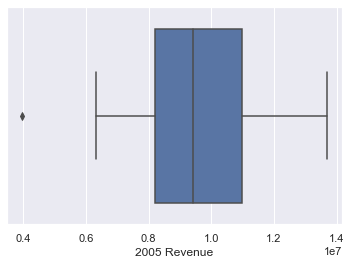

In [27]:
x = df_copy.loc[df_copy["Industry"] == "Education", "2005 Revenue"]
ax = sns.boxplot(x)

### What is number of companies in Each industry 

In [19]:
df_copy.groupby(['Industry']).count()["ID"]

Industry
Aerospace and Defense         1
Business & Legal Services    45
Data/Technology              98
Education                    19
Energy                       28
Environment & Weather        12
Finance & Investment         75
Food & Agriculture            6
Geospatial/Mapping           30
Governance                   43
Healthcare                   40
Housing/Real Estate          21
Insurance                    11
Lifestyle & Consumer         25
Media                         1
Research & Consulting        28
Scientific Research          17
Software                      1
Transportation               28
Name: ID, dtype: int64

### Draw a correlation plot to check on feature realtionship

In [20]:
ch = df_copy.groupby(['Industry']).mean()
ch

,ID,Employees,2005 Revenue,2005 Expenses,2005 Growth%,2004 Revenue,2004 Expenses
Industry,,,,,,,
Aerospace and Defense,494.000000,200.000000,9.131314e+06,5.992590e+06,3.776346,1.911778e+06,1.525915e+06
Business & Legal Services,260.977778,12709.711111,9.207455e+06,4.666570e+06,2.917998,2.422694e+06,1.427373e+06
Data/Technology,243.653061,9234.428571,9.551952e+06,4.454143e+06,2.952745,2.487219e+06,1.440026e+06
Education,274.578947,8155.473684,9.321177e+06,5.022252e+06,3.259531,2.232191e+06,1.415137e+06
Energy,314.642857,13490.642857,9.947788e+06,4.411721e+06,3.207355,2.440531e+06,1.444541e+06
Environment & Weather,308.000000,9720.416667,9.145531e+06,5.128682e+06,3.241961,2.197185e+06,1.547864e+06
Finance & Investment,239.613333,10458.040000,9.954849e+06,4.613935e+06,3.113578,2.526253e+06,1.469402e+06
Food & Agriculture,234.833333,6059.666667,1.020381e+07,4.908829e+06,3.204338,2.571432e+06,1.438234e+06
Geospatial/Mapping,269.733333,10670.133333,9.671093e+06,4.874998e+06,3.044032,2.430495e+06,1.486910e+06


In [21]:
ch.columns

Index(['ID', 'Employees', '2005 Revenue', '2005 Expenses', '2005 Growth%',
       '2004 Revenue', '2004 Expenses'],
      dtype='object')

In [22]:
#df = df.drop(['City' , 'Zip Code' , '2004 Growth%','2003 Revenue','2003 Expenses'], axis=1)

coordata = ch.drop(['ID'],axis=1)

In [23]:
correlations = coordata.corr()

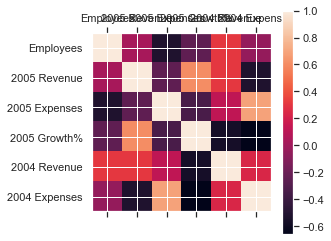

In [24]:
plt.matshow(coordata.corr())
#fig = plt.figure(figsize=(11,9))
plt.xticks(range(len(coordata.columns)), coordata.columns)
plt.yticks(range(len(coordata.columns)), coordata.columns)
plt.colorbar()
plt.show()


<AxesSubplot:>

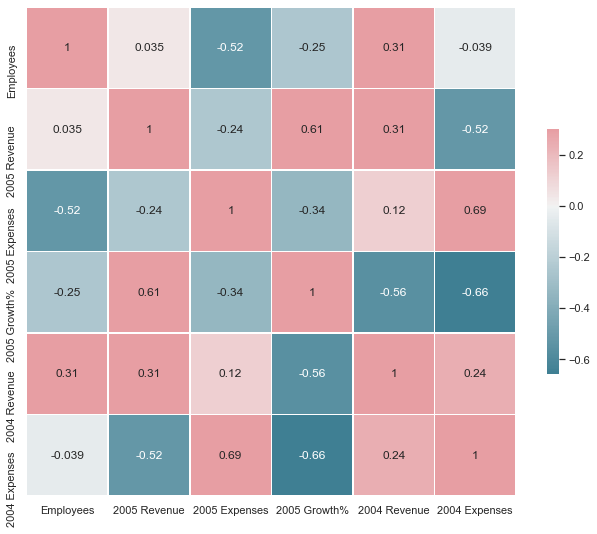

In [25]:
# Compute the correlation matrix
corr = coordata.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
